#Visualización de Municipios

In [1]:
#Se instalan librerías

%%capture
!pip install geopandas
!pip install matplotlib

In [2]:
#Se importan librerías

from netCDF4 import Dataset # netCDF4 es para lectura de archivos netCDF
import pylab as plt         # Pylab es para graficos
import numpy as np          # Numpy es para arreglos numéricos
import pandas as pd         # Pandas es para manejo de Tablas de datos
import geopandas as gpd     # 
from shapely.geometry import Point, Polygon

In [ ]:
#Lectura de archivos txt asociados a vértices y centroides de municipios

vertices_muni = pd.read_csv('/content/Vertices_municipios_AC.txt', sep='\s+')
centroides_muni = pd.read_csv('/content/Centroides_municipios_AC.txt', sep='\s+')
vertices_muni

,ID,Long,Lat
0,PAN.1.1_1,-81.915970,9.212361
1,PAN.1.1_1,-81.915970,9.211805
2,PAN.1.1_1,-81.915703,9.211810
3,PAN.1.1_1,-81.915703,9.210971
4,PAN.1.1_1,-81.916252,9.210971
...,...,...,...
789262,BLZ.6_1,-88.269302,16.110695
789263,BLZ.6_1,-88.269302,16.111250
789264,BLZ.6_1,-88.269028,16.111250
789265,BLZ.6_1,-88.269028,16.111528


In [ ]:
geometry = [Point(xy) for xy in zip(vertices_muni.Long, vertices_muni.Lat)]
geometry2 = [Point(xy) for xy in zip(centroides_muni.X, centroides_muni.Y)]

vertices_muni['geometry'] = geometry
centroides_muni['geometry'] = geometry2

vertices_muni.drop(['Lat','Long'], axis = 1, inplace=True)
centroides_muni.drop(['Y','X'], axis = 1, inplace=True)

crs = {'init': 'epsg:4326'}
spray_locs = gpd.GeoDataFrame(vertices_muni, crs=crs, geometry=geometry)
spray_locs2 = gpd.GeoDataFrame(centroides_muni, crs=crs, geometry=geometry2)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
lat_point_list = vertices_muni['Lat']
lon_point_list = vertices_muni['Long']

polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
crs = {'init': 'epsg:4326'}
polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])       
print(polygon.geometry)

polygon.to_file(filename='polygon.geojson', driver='GeoJSON')
polygon.to_file(filename='polygon.shp', driver="ESRI Shapefile")

KeyError: ignored

In [ ]:
!pip install folium

In [ ]:
spray_locs.to_file(filename='polygon.shp', driver="ESRI Shapefile")

NameError: ignored

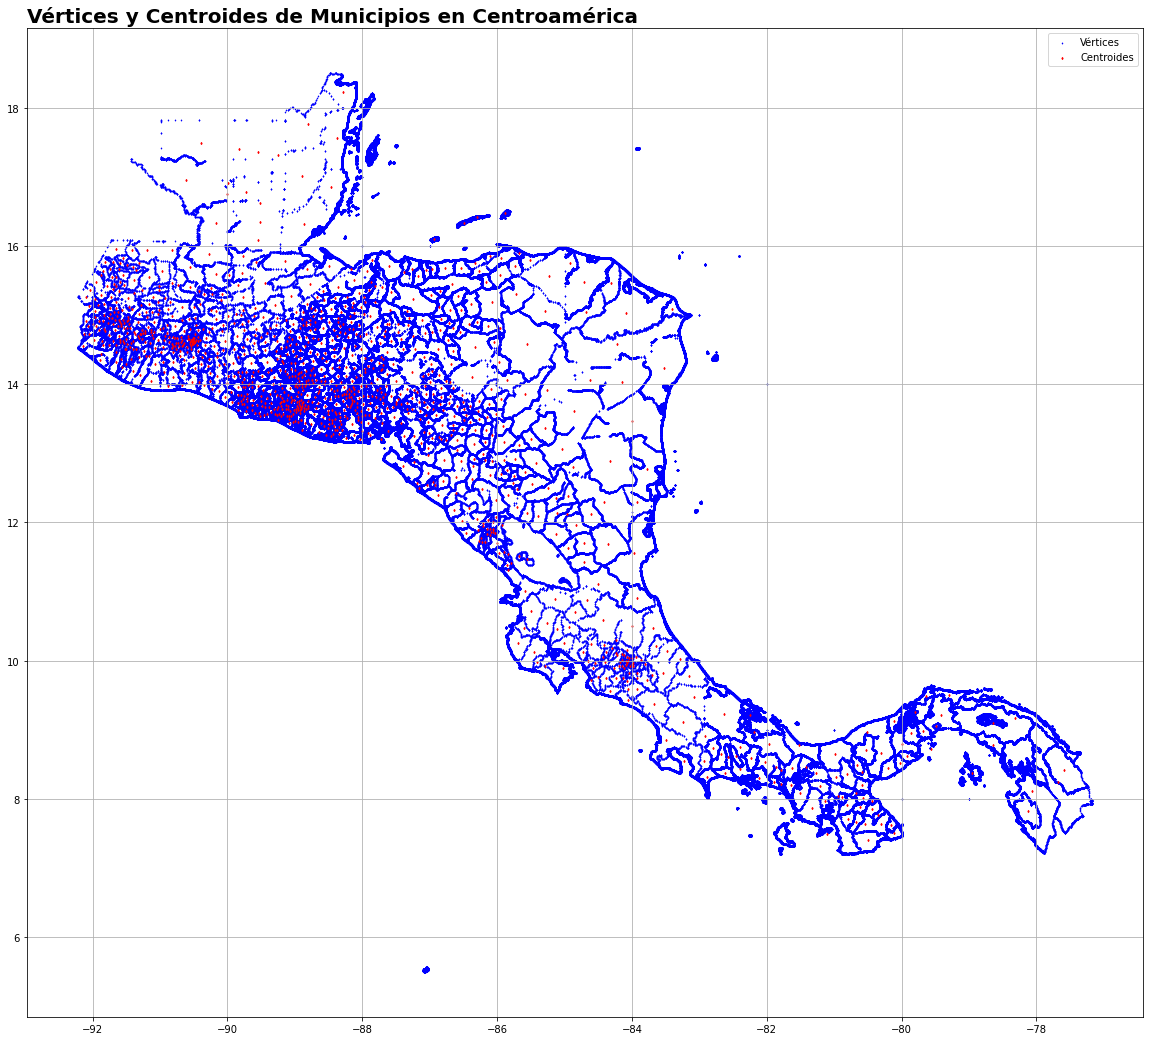

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))
spray_locs.geometry.plot(marker='d', color='blue', markersize=0.5, ax=ax, label = 'Vértices')
spray_locs2.geometry.plot(marker='d', color='red', markersize=4.0, ax=ax, label = 'Centroides')



plt.title('Vértices y Centroides de Municipios en Centroamérica', fontweight='bold', fontsize=20, loc='left')
plt.grid()
plt.legend()

#Visualización de CHIRPS

In [ ]:
#Lectura de datos de precipitación

chirps = Dataset("/content/drive/MyDrive/chirps/chirps-v2.0.2019.days_p05_CORDEX_CAM.nc", format='NETCDF4_CLASSIC' , crs = {'init': 'epsg:4326'})

In [ ]:
chirps

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.9rc4 (https://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    institution: Climate Hazards Group.  University of California at Santa Barbara
    title: CHIRPS Version 2.0
    history: Mon Mar 15 09:17:39 2021: cdo -f nc4c -z zip_9 sellonlatbox,235,333,-20,35 data.nc chirps-v2.0.2019.days_p05_CORDEX_CAM.nc
created by Climate Hazards Group
    version: Version 2.0
    date_created: 2020-01-16
    creator_name: Pete Peterson
    creator_email: pete@geog.ucsb.edu
    documentation: http://pubs.usgs.gov/ds/832/
    reference: Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros, D.H., Verdin, J.P., Rowland, J.D., Romero, B.E., Husak, G.J., Michaelsen, J.C., and Verdin, A.P., 2014, A quasi-global precipitation time series for drought monitoring: U.S. Geological Survey Data Series 832, 4 p., http://dx.doi.org/110.3133/ds832. 
    comments:  time variable de

In [ ]:
chirps.variables

{'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     standard_name: latitude
     long_name: latitude
     units: degrees_north
     axis: Y
 unlimited dimensions: 
 current shape = (1100,)
 filling off, 'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     standard_name: longitude
     long_name: longitude
     units: degrees_east
     axis: X
 unlimited dimensions: 
 current shape = (1960,)
 filling off, 'precip': <class 'netCDF4._netCDF4.Variable'>
 float32 precip(time, latitude, longitude)
     standard_name: convective precipitation rate
     long_name: Climate Hazards group InfraRed Precipitation with Stations
     units: mm/day
     _FillValue: -9999.0
     missing_value: -9999.0
     time_step: day
     geostatial_lat_min: -50.0
     geostatial_lat_max: 50.0
     geostatial_lon_min: -180.0
     geostatial_lon_max: 180.0
 unlimited dimensions: time
 current shape = (365, 1100, 1960)
 filling off, 'time': <class 'netCDF4.

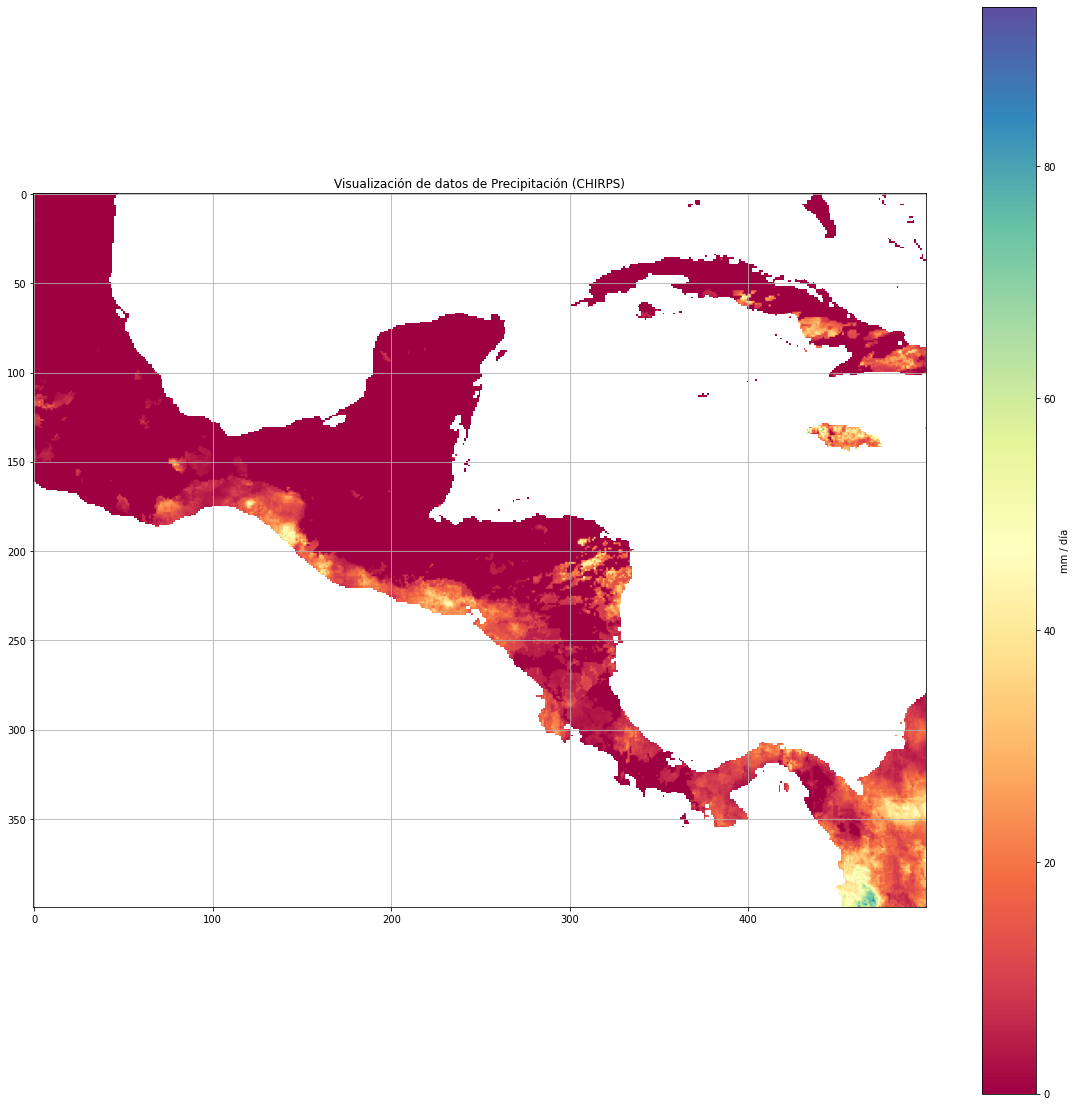

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))

data = np.rot90(chirps.variables['precip'][144])
data1= np.rot90(data)
dataf = np.fliplr(data1)

im = ax.imshow(dataf[200:600,500:1000], cmap='Spectral')
plt.title('Visualización de datos de Precipitación (CHIRPS)')
plt.colorbar(im,label="mm / día")
plt.grid('grid_solid_capstyle')
plt.savefig('/content/prueba.png')
plt.show()

Con las siguientes dos celdas de código es posible realizar animaciones con los datos de precipitación y guardarlas en archivos de tipo GIF.

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))

data = np.rot90(chirps.variables['precip'][0])
data1= np.rot90(data)
dataf = np.fliplr(data1)

im = ax.imshow(dataf[200:600,500:1000], cmap='Spectral')
plt.title('Visualización de datos de Precipitación (CHIRPS)')
plt.colorbar(im,label="mm / día")
plt.grid('grid_solid_capstyle')
plt.savefig('/content/prueba.png')
plt.show()

In [ ]:
import PIL
image_frames = []
days = np.arange(0,50) # sub-sample day number 20 to 80
for k in days:
    new_frame = PIL.Image.open("""/content/"""+str(k)+"""d.png""") 
    image_frames.append(new_frame)
# save as GIF
image_frames[0].save('/content/animacion_CHIRPS2.gif',
                     format='GIF',
                     append_images = image_frames[0:50],
                     save_all = True, 
                     duration = 200,
                     loop = 0)

In [ ]:
chirps.variables['precip'][:]

#Cálculo de promedios

El siguiente código calcula los promedios de precipitación para cada municipio y un año en específico, posteriormente almenena los datos en una lista 

In [ ]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpltPath
import copy


vertices = pd.read_csv('/content/drive/MyDrive/chirps/Vertices_municipios_AC.txt', delimiter = "\t",dtype={'ID': str})
centroides = pd.read_csv('/content/drive/MyDrive/chirps/Centroides_municipios_AC.txt', sep='\s+')

fn = '/content/drive/MyDrive/chirps/chirps-v2.0.1995.days_p05_CORDEX_CAM.nc'
ds = nc.Dataset(fn)

data=[]
days = range(0,365)

c = centroides['ID']
c.pop(106) #NIC.5.4_1

small_muni = []
empty_muni = []


for muni in c:

  for day in days:
  
    pa1 = vertices[vertices['ID'] == muni]
    lon = pa1['Long']
    lat = pa1['Lat']

    max_lon, min_lon = (max(lon),min(lon))
    max_lat, min_lat = (max(lat),min(lat))

###########################################################################################################
    

    lat_series = pd.Series(ds['latitude'][:])
    lon_series = pd.Series(ds['longitude'][:])

    boolats = lat_series[(lat_series <= max_lat) & (lat_series >= min_lat)] #delimito para hacer más rapido el algoritmo
    boolons = lon_series[(lon_series <= max_lon) & (lon_series >= min_lon)]

    r = list(boolons) * len(boolats) #longitudes que brinda el netcdf que están cerca del poli
    s = list(boolats) * len(boolons) #latitudes que brinda el netcdf que están cerca del poli
    s.sort()

    points = [[lon,lat] for lon,lat in zip(r,s)] #Hago una lista con todos los pares ordenados posibles para el poligono

    if points == []:
      small_muni.append(muni)  #municipios más pequeños que la resolución espacial del netCDF

    else:
      all_possible_precips = ds['precip'][day, boolats.index[0]:boolats.index[-1] + 1, boolons.index[0]:boolons.index[-1] + 1]

      all_possible_precips = all_possible_precips.flatten()

###########################################################################################################
#Aquí empiezo a arreglar los poligonos

      lon = lon.reset_index(drop = True) 
      lat = lat.reset_index(drop = True)

      lon_copy = copy.deepcopy(lon) 
      lat_copy = copy.deepcopy(lat)

      lenght = len(lon)
      lands = []
      index = 0

      while len(lon) != 0:
          sublat,sublon = (lat.drop(index), lon.drop(index))
          if lon[index] == lon[lenght - 1]:
              lands.append([index,lenght])
              break
          elif (lon[index],lat[index]) in zip(sublon,sublat): 
              twin1 = lon[lon == lon[index]].index
              twin2 = lat[lat == lat[index]].index
              index_of_equals = [element for element in twin1 if element in twin2]
              lands.append(index_of_equals)
              diff = index_of_equals[-1] - index_of_equals[0]
              lat = lat[(diff + 1):]
              lon = lon[(diff + 1):]
              index = (index_of_equals[-1] + 1)
          else:
              index += 1
              lat = lat[index:]
              lon = lon[index:]

      total_precips = []
      for land in lands:
          lon = lon_copy[land[0]:land[-1] + 1]
          lat = lat_copy[land[0]:land[-1] + 1]
          ff = zip(lon,lat)
          polygon = list(ff) #Hago pares ordenados para crear el poligono
          path = mpltPath.Path(polygon)    
          inside = path.contains_points(points)    
          precip_inside_poly = all_possible_precips[inside]    
          total_precips.append(list(precip_inside_poly))
 
      total_precips_flat = np.concatenate(total_precips).flat

      if len(total_precips_flat) == 0:
        empty_muni.append(muni)  # municipios sin nungún punto del netCDF dentro

      else:
        data.append(np.nanmean(total_precips_flat))

<string>:6: UserWarning: Warning: converting a masked element to nan.
<string>:6: UserWarning: Warning: converting a masked element to nan.
<string>:6: UserWarning: Warning: converting a masked element to nan.
<string>:6: UserWarning: Warning: converting a masked element to nan.
<string>:6: UserWarning: Warning: converting a masked element to nan.
<string>:6: UserWarning: Warning: converting a masked element to nan.
<string>:6: UserWarning: Warning: converting a masked element to nan.
<string>:6: UserWarning: Warning: converting a masked element to nan.
<string>:6: UserWarning: Warning: converting a masked element to nan.
<string>:6: UserWarning: Warning: converting a masked element to nan.
<string>:6: UserWarning: Warning: converting a masked element to nan.
<string>:6: UserWarning: Warning: converting a masked element to nan.
<string>:6: UserWarning: Warning: converting a masked element to nan.
<string>:6: UserWarning: Warning: converting a masked element to nan.
<string>:6: UserWarn

In [ ]:
data

[0.0,
 0.7540069818496704,
 6.152733768735613,
 20.012667451586044,
 1.2766696555273873,
 0.28930115699768066,
 0.0,
 14.040386302130562,
 22.96473833492824,
 1.6163484028407507,
 0.4893623760768345,
 0.34592853273664204,
 0.0,
 0.0,
 0.0,
 0.0,
 0.623283863067627,
 0.0,
 0.0,
 45.80823571341379,
 0.0,
 0.0,
 1.7418657030378069,
 6.6857452392578125,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6018791198730469,
 0.6741046905517578,
 0.0,
 22.66623932974679,
 0.0,
 25.876443454197474,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.003491129193987,
 1.8269976888384138,
 0.0,
 0.0,
 0.7799503462655204,
 1.5295511654445104,
 1.5295511654445104,
 15.140536989484515,
 1.6561265672956194,
 1.6561265672956194,
 1.6561265672956194,
 30.272583280290878,
 0.0,
 0.0,
 10.5051817212786,
 0.0,
 0.0,
 16.05351141520909,
 1.3121812002999442,
 0.0,
 0.0,
 0.0,
 0.7905873571123395,
 5.13598278590611,
 16.139539446149552,
 14.443567684718541,
 13.708834511893135,
 0.0,
 0.0,
 1.9558070046561105,
 0.0,
 37.133681297302246,
 0.0,
 11.466

Ahora es necesario reordenar los datos en el formato deseado, colocando las series de cada municipio en una columna respectivamente y guardando los datos en un archivo de tipo txt.

In [ ]:
import numpy as np          # Numpy es para arreglos numéricos
import pylab as plt         # Pylab es para graficación 
import pandas as pd         # Pandas es para manejo de Tablas de datos

data = pd.to_numeric(data,errors='coerce')
reshape_data = data.reshape(1116,365)
final_data = pd.DataFrame(reshape_data)
final_data = final_data.T
final_data
final_data.to_csv(r'1995.txt', sep='\t')

In [ ]:
final_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.167098,2.179457,3.732367,3.781868,4.489630,3.096103,13.483105,6.822741,9.993153,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.277140,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.238384,11.373908,8.681339,3.306552,4.499429,0.424020
1,0.754007,0.000000,0.217250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098035,0.000000,0.000000,1.108110,0.743977,1.482720,0.000000,0.000000,0.000000,2.859286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.398205,6.847106,2.130410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.717689,21.900810,7.072094,23.236929,23.412496,20.207257
2,6.152734,3.139320,0.327850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.164990,0.000000,0.000000,0.000000,5.763448,1.544324,2.301046,0.686090,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.224484,0.000000,...,59.921037,31.260249,21.950359,16.855167,1.944068,0.000000,0.000000,0.000000,0.000000,0.626855,0.800787,0.000000,0.000000,0.000000,0.000000,NaN,3.061123,6.540496,4.910267,0.000000,0.000000,0.000000,4.955406,5.281091,2.993613,5.022122,42.310749,0.000000,2.888678,3.981295,5.166243,0.000000,4.520699,23.980148,1.773254,3.384283,2.897507,6.339662,3.195318,7.452927
3,20.012667,25.070782,9.857816,0.000000,0.000000,6.180587,14.930937,2.192311,2.140790,7.955748,10.612428,0.000000,4.665392,0.000000,0.497792,0.468076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.407457,0.000000,0.000000,0.023295,0.039680,0.040508,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,25.648513,3.142663,3.983292,2.321293,42.472717,2.654690,2.591262,0.000000,2.936714,0.000000,0.000000,1.012332,0.000000,1.554997,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2.831278,0.000000,0.000000,0.000000,0.000000,6.903986,2.705183,0.000000,0.000000,0.000000,3.165632,0.000000,3.505078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.276670,0.000000,1.884641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.684160,0.000000,1.400347,0.000000,0.000000,0.000000,2.024931,0.000000,0.000000,0.000000,0.000000,0.046620,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.196513,0.000000,...,0.000000,0.000000,1.167864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.104938,0.632316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# Concatenación de datos

In [ ]:
import pandas as pd


a_1981  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/1981.txt', delimiter = "\t")
a_1982  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/1982.txt', delimiter = "\t")
a_1983  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/1983.txt', delimiter = "\t")
a_1984  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/1984.txt', delimiter = "\t")
a_1985  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/1985.txt', delimiter = "\t")
a_1986  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/1986.txt', delimiter = "\t")
a_1987  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/1987.txt', delimiter = "\t")
a_1988  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/1988.txt', delimiter = "\t")
a_1989  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/1989.txt', delimiter = "\t")

a_1990  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/1990.txt', delimiter = "\t")
a_1991  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/1991.txt', delimiter = "\t")
a_1992  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/1992.txt', delimiter = "\t")
a_1993  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/1993.txt', delimiter = "\t")
a_1994  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/1994.txt', delimiter = "\t")
a_1995  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/1995.txt', delimiter = "\t")
a_1996  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/1996.txt', delimiter = "\t")
a_1997  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/1997.txt', delimiter = "\t")
a_1998  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/1998.txt', delimiter = "\t")
a_1999  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/1999.txt', delimiter = "\t")

a_2000  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/2000.txt', delimiter = "\t")
a_2001  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/2001.txt', delimiter = "\t")
a_2002  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/2002.txt', delimiter = "\t")
a_2003  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/2003.txt', delimiter = "\t")
a_2004  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/2004.txt', delimiter = "\t")
a_2005  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/2005.txt', delimiter = "\t")
a_2006  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/2006.txt', delimiter = "\t")
a_2007  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/2007.txt', delimiter = "\t")
a_2008  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/2008.txt', delimiter = "\t")
a_2009  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/2009.txt', delimiter = "\t")

a_2010  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/2010.txt', delimiter = "\t")
a_2011  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/2011.txt', delimiter = "\t")
a_2012  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/2012.txt', delimiter = "\t")
a_2013  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/2013.txt', delimiter = "\t")
a_2014  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/2014.txt', delimiter = "\t")
a_2015  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/2015.txt', delimiter = "\t")
a_2016  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/2016.txt', delimiter = "\t")
a_2017  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/2017.txt', delimiter = "\t")
a_2018  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/2018.txt', delimiter = "\t")
a_2019  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/2019.txt', delimiter = "\t")
a_2020  = pd.read_csv('/content/drive/MyDrive/datos_asistencia/2020.txt', delimiter = "\t")




In [ ]:
full_series = [a_1981, a_1982, a_1983, a_1984, a_1985, a_1986, a_1987, a_1988, a_1989, a_1990, a_1991, a_1992, a_1993, a_1994, a_1995, a_1996, a_1997, a_1998, a_1999, a_2000, a_2001, a_2002, a_2003, a_2004, a_2005, a_2006, a_2007, a_2008, a_2009, a_2010, a_2011, a_2012, a_2013, a_2014, a_2015, a_2016, a_2017,a_2018,a_2019, a_2020]
vertical_concat = pd.concat(full_series, axis=0)
vertical_concat.to_csv(r'CHIRPS_series.txt', sep='\t')
vertical_concat

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115
0,0,57.301228,71.139190,37.439258,0.000000,0.000000,4.863951,17.663221,2.593216,0.000000,4.290497,2.342378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.137182,0.000000,0.000000,0.000000,0.000000,0.000000,15.221365,0.000000,0.000000,0.368064,1.350298,2.702831,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,3.034055,...,22.995096,84.235917,21.444757,74.125328,27.881696,0.000000,2.728887,0.000000,0.000000,0.000000,0.000000,0.856389,0.000000,0.134224,0.000000,NaN,0.000000,0.000000,0.000000,3.194208,5.18544,0.000000,0.0,17.827608,0.000000,0.000000,49.819160,0.454864,0.000000,4.938365,0.0,0.000000,0.000000,39.467480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,11.125046,4.631406,9.062865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.031371,0.000000,0.000000,0.244407,9.636394,15.982379,33.781582,62.886764,34.191074,1.467934,3.385194,9.829512,0.096593,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,21.689977,...,3.867065,17.798144,20.363914,26.546671,0.271166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.374215,0.510698,0.657537,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,25.051922,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,16.940866,14.976773,7.729507,3.240530,4.310229,1.615071,0.536167
2,2,8.034467,0.030214,15.731768,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.910765,0.000000,0.000000,0.000000,1.786518,3.071938,1.245998,42.750534,14.416302,41.582066,22.563000,10.428526,4.305774,81.614235,21.246256,18.038403,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,3.270499,...,10.082866,31.407033,23.016232,40.912445,0.744102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.361583,0.000000,0.000000,NaN,4.580971,3.618419,1.098974,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,1.289106,23.059155,0.000000,4.428649,0.000000,0.0,0.000000,0.734165,15.593297,0.000000,0.378341,0.000000,0.000000,0.000000,0.206085
3,3,23.125627,8.041372,19.749775,2.405683,0.287933,5.089338,11.934755,0.000000,5.148465,8.131812,17.297981,5.305325,0.000000,6.368420,5.074533,0.589205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.294755,1.363024,0.000000,0.000000,0.000000,0.068950,0.000000,0.000000,0.131645,0.0,0.000000,0.000000,0.47136,0.000000,0.0,0.000000,0.000000,...,5.459370,19.941759,19.915800,30.274120,1.442786,1.803765,1.277109,0.000000,0.000000,1.577543,0.000000,0.057160,4.115342,0.000000,0.000000,NaN,0.936536,0.000000,0.000000,0.000000,0.00000,0.432447,0.0,4.222271,0.000000,0.000000,36.154480,0.171267,0.478856,0.000000,0.0,2.274638,0.000000,24.448753,0.000000,0.364740,0.000000,0.000000,0.000000,4.921717
4,4,24.831181,32.881231,10.721305,2.122071,8.103163,1.925213,0.000000,13.687461,0.000000,0.000000,0.000000,0.844673,22.583788,0.283404,0.000000,2.890250,0.390928,1.489132,2.782159,1.164351,0.000000,0.488337,38.833435,15.575500,9.816106,27.096711,0.000000,7.827392,6.265141,2.094292,7.236371,0.0,0.150442,0.494795,0.00000,0.000000,0.0,0.000000,0.000000,...,8.206915,4.062467,7.672690,6.724423,6.850524,7.135230,14.355571,13.634649,22.805264,0.000000,4.074328,23.761762,0.000000,40.039088,9.334961,NaN,3.136873,0.000000,3.912760,0.000000,0.00000,6.801402,0.0,0.000000,3.610932,0.000000,0.000000,2.867089,3.707608,0.000000,0.0,7.883296,1.537683,0.000000,1.122137,1.518394,0.000000,0.000000,26.719548,10.455909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

A continuación se muestra un código para concatenar los datos de forma automatizada, sin embargo, se obtienen en un orden distinto al deseado ya que no realiza la distinción de años. 

In [ ]:
import pandas as pd
import glob
import datetime
import os 

#all_files = glob.glob('*.csv')

ruta = f'/content/drive/MyDrive/datos_asistencia'
all_files = glob.glob(os.path.join(ruta, "*.txt"))

if len(all_files) != 0:
    
    df_from_each_file = (pd.read_csv(f,index_col=None) for f in all_files)
    concatenated_df   = pd.concat(df_from_each_file, axis =0,ignore_index=True )
    concatenated_df.to_csv(r'CHIRPS_final.txt', sep=',')
#else: 

In [ ]:
all_files

['/content/drive/MyDrive/datos_asistencia/1982.txt',
 '/content/drive/MyDrive/datos_asistencia/1981.txt',
 '/content/drive/MyDrive/datos_asistencia/1983.txt',
 '/content/drive/MyDrive/datos_asistencia/1985.txt',
 '/content/drive/MyDrive/datos_asistencia/1984.txt',
 '/content/drive/MyDrive/datos_asistencia/1990.txt',
 '/content/drive/MyDrive/datos_asistencia/1991.txt',
 '/content/drive/MyDrive/datos_asistencia/1992.txt',
 '/content/drive/MyDrive/datos_asistencia/1993.txt',
 '/content/drive/MyDrive/datos_asistencia/1994.txt',
 '/content/drive/MyDrive/datos_asistencia/1988.txt',
 '/content/drive/MyDrive/datos_asistencia/1986.txt',
 '/content/drive/MyDrive/datos_asistencia/1987.txt',
 '/content/drive/MyDrive/datos_asistencia/2005.txt',
 '/content/drive/MyDrive/datos_asistencia/2007.txt',
 '/content/drive/MyDrive/datos_asistencia/2006.txt',
 '/content/drive/MyDrive/datos_asistencia/2009.txt',
 '/content/drive/MyDrive/datos_asistencia/2019.txt',
 '/content/drive/MyDrive/datos_asistencia/1997

# Mapas de Percentiles

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/chirps/precip_CHIRPS_1981-2020_actualizado.txt', sep='\s+', header=None)
centroides = pd.read_csv('/content/drive/MyDrive/chirps/Centroides_municipios_actualizado.txt', sep='\s+')

El siguiente código se desarrolló para calcular y visualizar los percentiles asociados a los datos de precipitación de cada municipio.

In [ ]:
import folium
from folium import plugins
%matplotlib inline
import branca
import branca.colormap as cm
import numpy as np


#Calcula el percentil deseado
per = data.quantile(0.90)

#Toma la ubicación del municipio y el valor del percentil correspondiente
y=centroides['Y'].tolist()
x=centroides['X'].tolist()
z=per.tolist()
t =list(zip(y,x,z))

#Grafica el mapa de fondo
map = folium.Map(location=[11, -85], tiles='CartoDB Positron', zoom_start=6)

#Añade HeatMap de percentiles
gradient = {0.40: 'brown', .66: 'yellow', 1: 'green'}
map.add_child(plugins.HeatMap(t, radius = 12, gradient=gradient))

colormap = cm.LinearColormap(colors=['brown', 'yellow', 'green'], vmin = np.min(per), vmax = np.max(per), caption='Percentil 90 de precipitación diaria [mm/día]')
map.add_child(colormap)

In [ ]:
map.save('percentil_90.html')

In [ ]:
dat_Eta  = pd.read_csv('/content/Eta_precip.txt', delimiter = "\t", header=None)
dat_Eta

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114
0,58.838171,33.163158,52.757890,3.264575,17.519411,58.209610,67.096130,43.976128,26.593466,56.850651,41.789013,46.220298,40.471855,48.801331,51.360945,41.444425,9.592256,27.761454,59.650494,12.638437,36.986481,55.274330,48.996380,61.173829,75.373260,48.986375,19.889643,8.204986,6.508338,8.496839,8.925699,23.516048,46.611065,42.226521,47.381775,38.579998,41.087971,11.244991,6.329924,33.419384,...,76.150352,6.022022,2.440248,24.138176,13.336497,48.783916,32.570728,3.882653,39.512699,46.107462,0.000000,15.783901,43.764413,8.318316,0.000000,10.886241,0.000000,0.000000,3.173512,0.000000,0.000000,17.610699,0.000000,28.793068,8.254477,28.330791,0.000000,0.000000,30.887302,23.722202,5.149867,0.182442,1.597658,0.000000,0.533611,8.957336,3.748709,59.077275,52.395694,20.965197
1,38.150390,49.695098,43.279071,97.195312,92.441077,78.268265,55.562828,71.554474,57.324910,65.461197,57.923603,82.203227,75.928909,52.587433,48.013859,70.133116,1.891613,0.000000,25.842001,1.282199,8.224382,13.005758,40.933857,9.728239,30.352657,0.000000,0.674938,0.000000,0.000000,0.000000,0.000000,0.000000,1.658055,3.703127,4.544890,0.000000,2.115864,19.664251,3.370286,0.000000,...,142.387619,153.583481,59.376034,149.763745,34.213474,114.486397,58.641426,106.572698,53.538185,101.269829,89.858795,44.538368,81.399271,78.969925,63.631241,93.882095,79.195076,77.396461,114.800308,65.194901,122.693298,100.315628,84.148476,86.379196,87.922234,89.862724,71.092361,103.236229,112.542908,74.594749,99.871162,1.530068,4.657972,3.321707,0.768366,23.781941,46.677782,62.066064,23.918235,49.678280
2,0.000000,0.000000,0.000000,12.464815,24.900617,0.000000,0.000000,0.000000,39.221512,4.059252,27.428453,119.330630,0.000000,114.342445,79.733261,132.812550,0.000000,0.000000,0.000000,14.083887,33.417015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.216569,0.000000,5.117005,0.000000,0.000000,0.000000,0.000000,0.000000,...,54.986740,1.962175,0.000000,32.038994,0.118376,1.803716,0.000000,22.837555,74.134064,3.821157,77.682091,5.567802,46.729515,31.615070,0.000000,0.000000,0.000000,0.000000,5.821098,0.000000,0.000000,0.000000,15.391719,41.614052,21.872475,36.528625,0.000000,0.000000,23.332655,26.594759,17.409191,19.676225,18.179062,9.470147,1.870852,34.284814,26.783857,114.621395,86.514322,99.204951
3,1.212448,13.588902,0.000000,25.694908,16.023750,4.396183,4.866711,20.985182,35.364324,13.842892,41.148758,0.000000,42.408806,0.000000,9.647527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.773556,18.163403,17.563290,94.554466,31.833597,34.143311,65.700592,46.034878,73.413788,96.377783,32.552261,65.420222,64.071093,61.539513,31.815620,51.627884,26.398357,9.730536,50.988953,21.731634,26.035162,56.431107,53.016155,15.972084,49.646473,73.028961,0.000000,34.412079,60.057373,82.257393,17.034443,53.316433,56.803623,51.446044,52.648315,73.778346,81.416257,43.405483,38.876838,60.464487
4,0.000000,0.668074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.634909,1.195975,2.424329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.717402,0.000000,...,115.084534,48.606213,0.990735,51.824452,0.000000,0.000000,0.000000,39.370587,36.359550,0.000000,58.216621,0.590094,64.009746,64.440788,63.631241,58.198242,52.796715,59.299572,44.348511,43.463268,53.842945,46.987808,4

In [ ]:
import folium
from folium import plugins
%matplotlib inline
import branca
import branca.colormap as cm
import numpy as np


#Calcula el percentil deseado
prom = dat_Eta.mean()

#Toma la ubicación del municipio y el valor del percentil correspondiente
y=centroides['Y'].tolist()
x=centroides['X'].tolist()
m=prom.tolist()
t =list(zip(y,x,m))

#Grafica el mapa de fondo
map = folium.Map(location=[11, -85], tiles='CartoDB Positron', zoom_start=6)

#Añade HeatMap de percentiles
gradient = {0.40: 'brown', .66: 'yellow', 1: 'green'}
map.add_child(plugins.HeatMap(t, radius = 12, gradient=gradient))

colormap = cm.LinearColormap(colors=['brown', 'yellow', 'green'], vmin = np.min(prom), vmax = np.max(prom), caption='Promedio de Precipitación diaria Eta [mm/día]')
map.add_child(colormap)

In [ ]:
dat_Eta

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114
0,58.838171,33.163158,52.757890,3.264575,17.519411,58.209610,67.096130,43.976128,26.593466,56.850651,41.789013,46.220298,40.471855,48.801331,51.360945,41.444425,9.592256,27.761454,59.650494,12.638437,36.986481,55.274330,48.996380,61.173829,75.373260,48.986375,19.889643,8.204986,6.508338,8.496839,8.925699,23.516048,46.611065,42.226521,47.381775,38.579998,41.087971,11.244991,6.329924,33.419384,...,76.150352,6.022022,2.440248,24.138176,13.336497,48.783916,32.570728,3.882653,39.512699,46.107462,0.000000,15.783901,43.764413,8.318316,0.000000,10.886241,0.000000,0.000000,3.173512,0.000000,0.000000,17.610699,0.000000,28.793068,8.254477,28.330791,0.000000,0.000000,30.887302,23.722202,5.149867,0.182442,1.597658,0.000000,0.533611,8.957336,3.748709,59.077275,52.395694,20.965197
1,38.150390,49.695098,43.279071,97.195312,92.441077,78.268265,55.562828,71.554474,57.324910,65.461197,57.923603,82.203227,75.928909,52.587433,48.013859,70.133116,1.891613,0.000000,25.842001,1.282199,8.224382,13.005758,40.933857,9.728239,30.352657,0.000000,0.674938,0.000000,0.000000,0.000000,0.000000,0.000000,1.658055,3.703127,4.544890,0.000000,2.115864,19.664251,3.370286,0.000000,...,142.387619,153.583481,59.376034,149.763745,34.213474,114.486397,58.641426,106.572698,53.538185,101.269829,89.858795,44.538368,81.399271,78.969925,63.631241,93.882095,79.195076,77.396461,114.800308,65.194901,122.693298,100.315628,84.148476,86.379196,87.922234,89.862724,71.092361,103.236229,112.542908,74.594749,99.871162,1.530068,4.657972,3.321707,0.768366,23.781941,46.677782,62.066064,23.918235,49.678280
2,0.000000,0.000000,0.000000,12.464815,24.900617,0.000000,0.000000,0.000000,39.221512,4.059252,27.428453,119.330630,0.000000,114.342445,79.733261,132.812550,0.000000,0.000000,0.000000,14.083887,33.417015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.216569,0.000000,5.117005,0.000000,0.000000,0.000000,0.000000,0.000000,...,54.986740,1.962175,0.000000,32.038994,0.118376,1.803716,0.000000,22.837555,74.134064,3.821157,77.682091,5.567802,46.729515,31.615070,0.000000,0.000000,0.000000,0.000000,5.821098,0.000000,0.000000,0.000000,15.391719,41.614052,21.872475,36.528625,0.000000,0.000000,23.332655,26.594759,17.409191,19.676225,18.179062,9.470147,1.870852,34.284814,26.783857,114.621395,86.514322,99.204951
3,1.212448,13.588902,0.000000,25.694908,16.023750,4.396183,4.866711,20.985182,35.364324,13.842892,41.148758,0.000000,42.408806,0.000000,9.647527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.773556,18.163403,17.563290,94.554466,31.833597,34.143311,65.700592,46.034878,73.413788,96.377783,32.552261,65.420222,64.071093,61.539513,31.815620,51.627884,26.398357,9.730536,50.988953,21.731634,26.035162,56.431107,53.016155,15.972084,49.646473,73.028961,0.000000,34.412079,60.057373,82.257393,17.034443,53.316433,56.803623,51.446044,52.648315,73.778346,81.416257,43.405483,38.876838,60.464487
4,0.000000,0.668074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.634909,1.195975,2.424329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.717402,0.000000,...,115.084534,48.606213,0.990735,51.824452,0.000000,0.000000,0.000000,39.370587,36.359550,0.000000,58.216621,0.590094,64.009746,64.440788,63.631241,58.198242,52.796715,59.299572,44.348511,43.463268,53.842945,46.987808,4

In [ ]:
prom

0       15.827920
1       16.224882
2       12.722139
3       15.402179
4       16.764984
          ...    
1110    44.877916
1111    44.355693
1112    42.200932
1113    26.629775
1114    27.614254
Length: 1115, dtype: float64